<a href="https://colab.research.google.com/github/Zeroflip64/Pet-projects/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**: Clustering of store customers to identify the best offers within the store chain.


We have customer data of the grocery store chain.We will divide the project into several tasks:
1.  Task 1: Clear the data and add additional functions.
2.  Task 2: It is necessary to identify the model that will best be able to divide buyers.
3.  Task 3: To analyze the resulting groups.
4.  Task 4: Draw conclusions and make suggestions.



## Loading data required by libraries

In [1]:
!pip install pyngrok
!pip install streamlit
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=8af97d1011a76968861203f4e2fe1fbba7cbb48e4958193e9d8cfb2bdf7ae947
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D #3d оси
from yellowbrick.cluster import KElbowVisualizer#выбор кролчества кластеров
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,RobustScaler,MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
import numpy as np
from scipy import stats
import phik
from phik import phik_matrix

In [3]:
df=pd.read_csv('/content/drive/MyDrive/учеба/marketing_campaign.csv',sep='\t')
my_colors=['#730080','#00ab66','#636363']

In [4]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.shape

(2240, 29)

In [7]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

## Task 1: Clear the data and add additional functions.

### Сheck for omissions and abnormal values

In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df.loc[df['Income'].isna()]# it is unclear whether zeros or omissions

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
10    15-11-2013       11         5  ...                  7             0   
27    20-02-2013       19         5  ...                  1             0   
43    05-11-2013       80        81  ...                  2             0   
48    01-01-2014       96        48  ...                  6             0   
58    17-06-2013       57        11  ...                  6             0   
71    14-09-2012       25        25  ...                  8             0   
90    19-11-2012        4       230  ...                  9             0   
91    27-05-2014       45         7  ...                  7             0   
92    23-11-2013       87       445  ...                  1             0   
128   11-07-2013       23       352  ...                  6             0   
133   11-08-2013       96       231  ...                  4             0   
312   03-06-2013       69       861  ...                  3             0   
319   23-08-2013       67       738  ...                  7             0   
1379  01-04-2013       39       187  ...                  5             0   
1382  03-09-2012       87        19  ...                  5             0   
1383  12-01-2014       49         5  ...                  7             0   
1386  02-03-2014       17        25  ...                  7             0   
2059  18-05-2013       52       375  ...                  3             0   
2061  31-05-2013       82        23  ...                  6             0   
2078  03-03-2013       82        71  ...                  8             0   
2079  23-06-2013       83       161  ...                  6             0   
2081  18-10-2013       95       264  ...                  7             0   
2084  30-10-2013       75       532  ...                  1             0   
2228  12-08-2012       53        32  ...                  0             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedC

In [10]:
df=df.loc[-df['Income'].isna()]# Remove the omissions in the Income column

interval columns not set, guessing: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable Z_CostContact for analysis 1. Dropping this column
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable Z_Revenue for analysis 1. Dropping this column
  warnings.warn(


<Axes: >

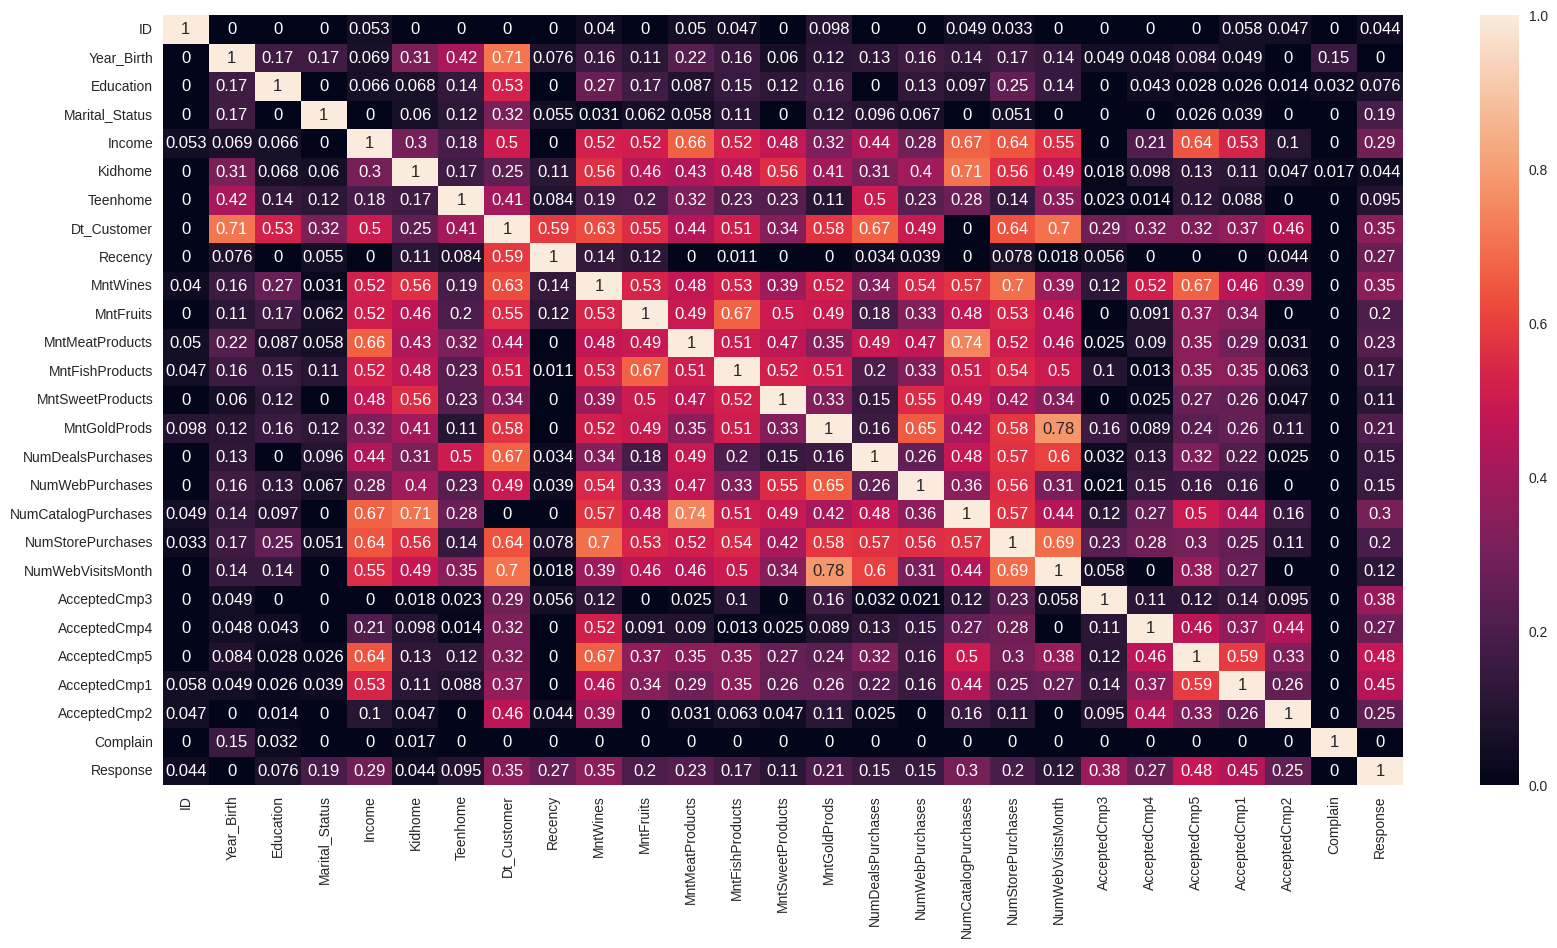

In [11]:
#Let's create a correlation matrix between the features to determine which features are important
matrix_corr=df.phik_matrix()
plt.figure(figsize=(20,10))
sns.heatmap(matrix_corr,annot=True)


In [12]:
#phik_matrix=df.significance_matrix() #let's make a matrix of the significance of the signs
#plt.figure(figsize=(20,10))
#sns.heatmap(phik_matrix,annot=True)

In [13]:
df.shape

(2216, 29)

In [14]:
import numpy as np

a=np.array([[2,11],[7,0]])

c = a.T @ a
c_vals, c_vecs = np.linalg.eig(c)

# Сортируем собственные значения.
indices = np.argsort(c_vals)  # Считаем индексы, упорядоченные по возрастанию.
indices = indices[::-1]  # "Переворачиваем", чтобы сделать сортировку по убыванию.
# Сортируем собственные значения (= берём их по отсортированным индексам).
c_vals = c_vals[indices]
# Сортируем собственные векторы (здесь [:, indices], потому что сортируем столбцы, а не строки).
V = c_vecs[:, indices]

S = np.diag(np.sqrt(c_vals))

U = a @ V @ np.linalg.inv(S)  # Считаем U по выведенной формуле.

print("Левые сингулярные векторы:")
print(c_vals)
print("Проверка:")
print((U @ S @ V.T).round())  # Округляем до целых. 

Левые сингулярные векторы:
[127.49691346  46.50308654]
Проверка:
[[ 2. 11.]
 [ 7. -0.]]


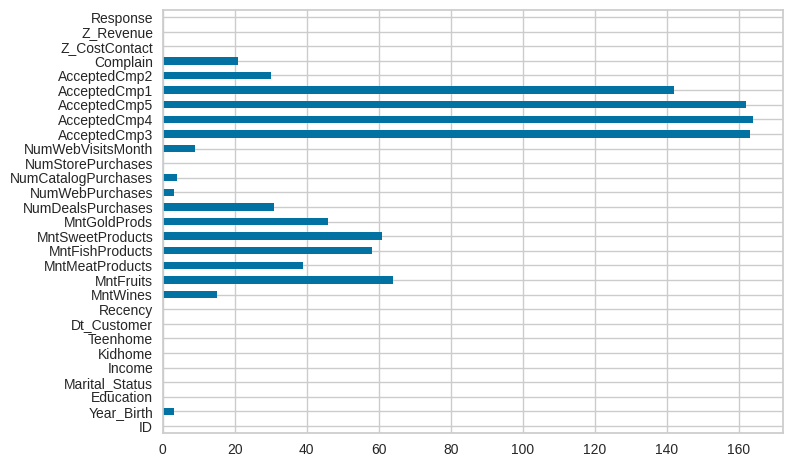

In [15]:
for i in [i for i in df.columns if df[i].dtype=='int']:
  data=df[i]
  z_scores = stats.zscore(data)
  threshold = 3
  outliers = df[np.abs(z_scores) > threshold]
  df.loc[outliers.index, i] = None
df.isna().sum().plot(kind='barh');

### Conclusion:

*   We have identified signs that may have a slight effect on the rest of the signs.In this regard, they decided to delete the 'Complain' , 'AcceptedCmp2','Z_CostContact' , 'Z_Revenue' , 'AcceptedCmp3' , 'NumDealsPurchases' , 'Recency' , 'ID' , 'Dt_Customer' , 'Response'  columns.
*   Let's remove the abnormal values



In [16]:
for i in ['NumWebPurchases', 'NumCatalogPurchases','NumWebVisitsMonth']:
  df=df.loc[df[i]<15]
df=df.drop(['Complain','AcceptedCmp2','Z_CostContact','Z_Revenue','AcceptedCmp3','NumDealsPurchases','Recency','ID','Dt_Customer','Response'],axis=1)
df=df.loc[df['Income']<100000]#We also see values that are knocked out of the total mass in the amount of profit
df=df.loc[df['Year_Birth']>1945]#We can see anomalies in the column with the date of birth, and therefore we will remove everyone older than 1945
df=df.loc[df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']!=0]#Removed those customers who did not make purchases in stores
df['Year_Birth']=df['Year_Birth'].astype('object')#Change of types 
columns_object=[i for i in  df.columns if df[i].dtypes!='int' and i!='Income' ]
df=df.dropna()


### Creating new features

*   Let's combine the family statuses.
*   Let's combine the signs of children and adolescents in the family.
*   Let's identify the percentage of purchases made directly in the store.
*   We will add new signs in the form of an average basket and customer activity.



In [17]:

bad=['Absurd','Alone','YOLO']
df=df.query('Marital_Status not in @bad')

def maried_status(data):
  
  if data['Marital_Status']in ['Married','Together']:
    return 'Married'
  elif data['Marital_Status'] in ['Divorced','Widow']:
    return 'Divorced'
  else:
    return data['Marital_Status']

def offline(data):
  online=data['NumWebPurchases']+data['NumCatalogPurchases']
  offline=data['NumStorePurchases']
  if online==0:
    return 1
  elif offline==0:
    return 0
  else:
    return np.round(offline/(online+offline),2)

df['Marital_Status']=df.apply(maried_status,axis=1)

df['Childs']=df['Kidhome']+df['Teenhome']

df['count_of_purchases']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

df['Basket']=np.round(df['Income']/(df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']),2)

df['procent_offline']=df.apply(offline,axis=1)

df['is_active']=((df['AcceptedCmp4']+df['AcceptedCmp5']+df['AcceptedCmp1'])>=2).map(int)

df=df.drop(['Kidhome','Teenhome','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1'],axis=1)

## Task 2: It is necessary to identify the model that will best be able to divide buyers.

### PCA

> Due to the fact that we have quite a lot of features and there is also a correlation between them, we will use the PCA algorithm in order to reduce the dimension



In [18]:
columns_num=[i for i in  df.columns if df[i].dtypes!='object' and i not in ['is_active','Response']]

preprocesing=make_column_transformer((OrdinalEncoder(),['Education','Marital_Status']),
                                     (StandardScaler(),columns_num),remainder='passthrough')

In [19]:
important=df[[i for i in df.columns][:4]]

In [20]:
df_encoder=pd.DataFrame(preprocesing.fit_transform(df),columns=df.columns)

In [21]:
df_encoder.dropna(inplace=True)

In [22]:
pca=PCA(n_components=3)
df_pca=pd.DataFrame(pca.fit_transform(df_encoder),columns=['list_c1','list_c2','list_c3'])
df_pca

list_c1   list_c2   list_c3
0    -12.647832  6.173722 -0.337451
1    -15.354136 -3.382980  1.045327
2     -4.589257  3.273300  0.433742
3     14.633787 -1.503025  0.204127
4     11.428716  1.831121 -0.097582
...         ...       ...       ...
1711   0.402438  3.011482 -2.211206
1712  16.695616 -2.369984  2.830228
1713   4.673084 -2.958599  1.134852
1714 -13.631730  2.984430  0.406810
1715 -15.444594 -2.103770 -0.541842

[1716 rows x 3 columns]

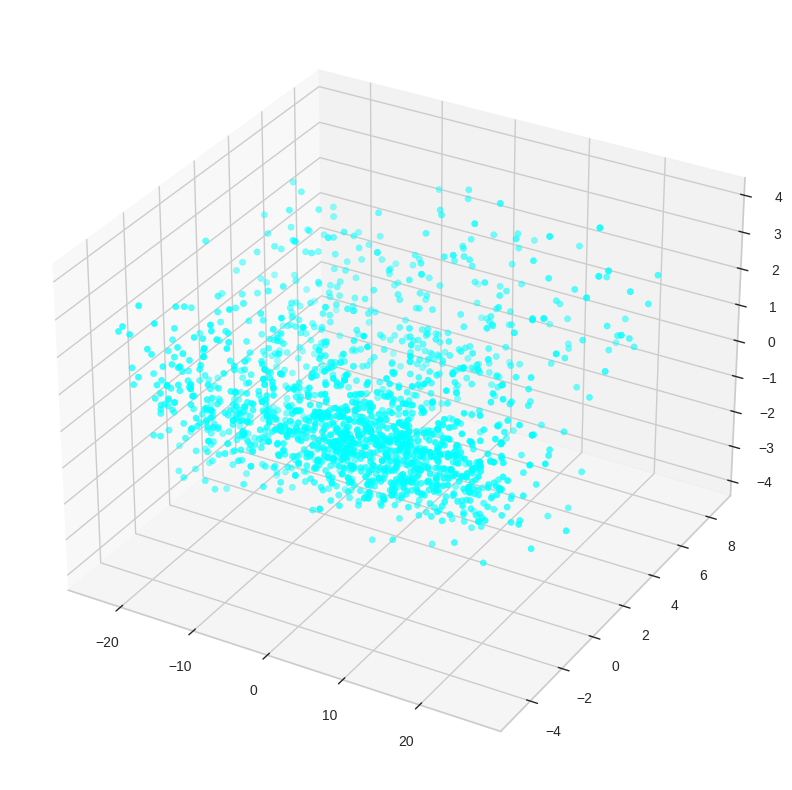

In [23]:
x =df_pca["list_c1"]
y =df_pca["list_c2"]
z =df_pca["list_c3"]
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="cyan", marker="o" )
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

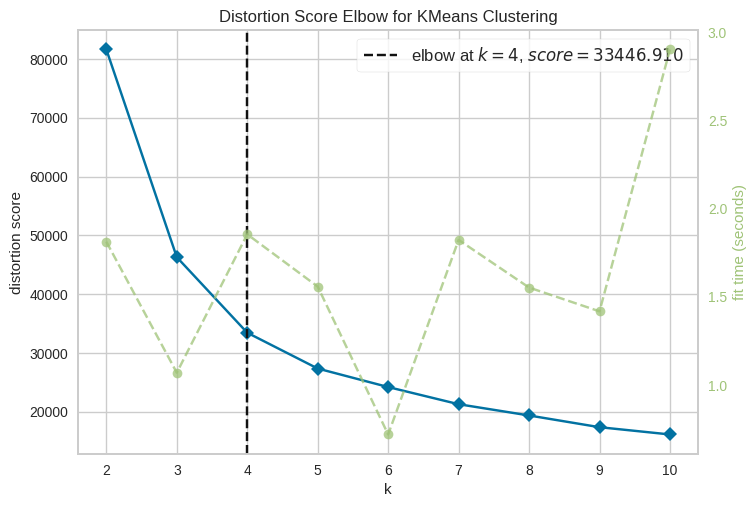

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)# Let's identify the proposed number of signs
Elbow_M.fit(df_pca)
Elbow_M.show()

### Create class

> Let's create a class thanks to which it will be possible to try different algorithms to identify the best model



In [25]:

class claster:
  def __init__(self,data):
    self.data=data

  def preprocesing(self,metod_of_object,metod_of_num):
    columns_num=[i for i in  self.data.columns if self.data[i].dtypes!='object' and i not in ['is_active','Response']]

    preprocesing=make_column_transformer((metod_of_object,['Education','Marital_Status']),
                                     (metod_of_num,columns_num),remainder='passthrough')
    
    self.df_encoder=pd.DataFrame(preprocesing.fit_transform(self.data),columns=self.data.columns)
    pca=PCA(n_components=3)
    self.df_pca=pd.DataFrame(pca.fit_transform(self.df_encoder),columns=['list_c1','list_c2','list_c3'])
    return self.df_pca

  def detected(self,algoritm,data):
    self.algoritm=algoritm
    Elbow_M = KElbowVisualizer(self.algoritm, k=10)
    Elbow_M.fit(data)
    Elbow_M.show()

  def work(self,model,data,num,score):
    models=model.fit(data)
    data['labels']=models.labels_
    silhouette_score=score[0](self.df_pca, models.labels_)
    davies_bouldin_score=score[1](self.df_pca, models.labels_)
    calinski_harabasz_score=score[2](self.df_pca, models.labels_)

    x = data["list_c1"]
    y = data["list_c2"]
    z = data["list_c3"]
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection="3d")
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal']
    labels = [f'Cluster {i+1}' for i in range(num)]
    for label, color, lab in zip(range(num), colors, labels):
        ax.scatter(x[data['labels']==label], y[data['labels']==label], z[data['labels']==label], c=color, marker="o", label=lab);
    plt.title(f'Кластеры покупателей с {num} кластерами')
    ax.legend()
    plt.show()
    pd.DataFrame({})
    print(pd.DataFrame({'Score':[silhouette_score,davies_bouldin_score,calinski_harabasz_score]},index=['silhouette_score','davies_bouldin_score','calinski_harabasz_score']))
    return model.labels_

### Models

*   I decided to use two algorithms these are K means and Agglomerative (since these are algorithms of different principles, it will be interesting to see which of them will show the best indicator)
*   We use a cycle from 2 to 5 clusters.
*   We use three metrics :
-- 1) Silhouette score: The silhouette score measures how well each data point is separated from its own cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better cluster separation.
-- 2) Calinski-Harabasz index: The Calinski-Harabasz index measures the ratio of the between-cluster variance to the within-cluster variance. Higher values indicate better cluster separation.
-- 3) Davies-Bouldin index: The Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster, and the average distance between each cluster and its least similar cluster. Lower values indicate better cluster separation.




Aglomerative


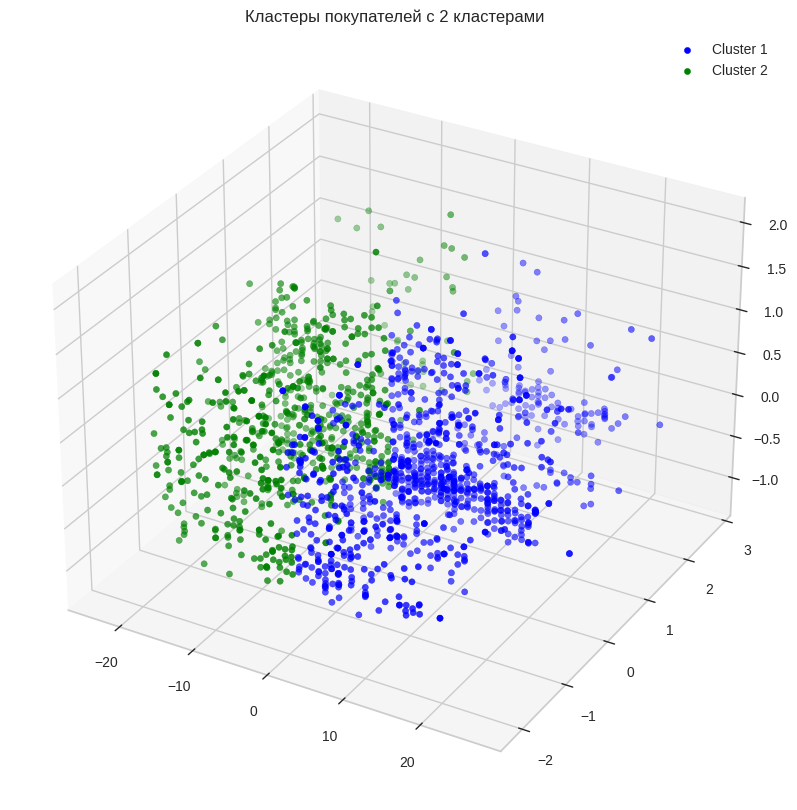

                               Score
silhouette_score            0.578132
davies_bouldin_score        0.565031
calinski_harabasz_score  3821.939482
Kmean


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


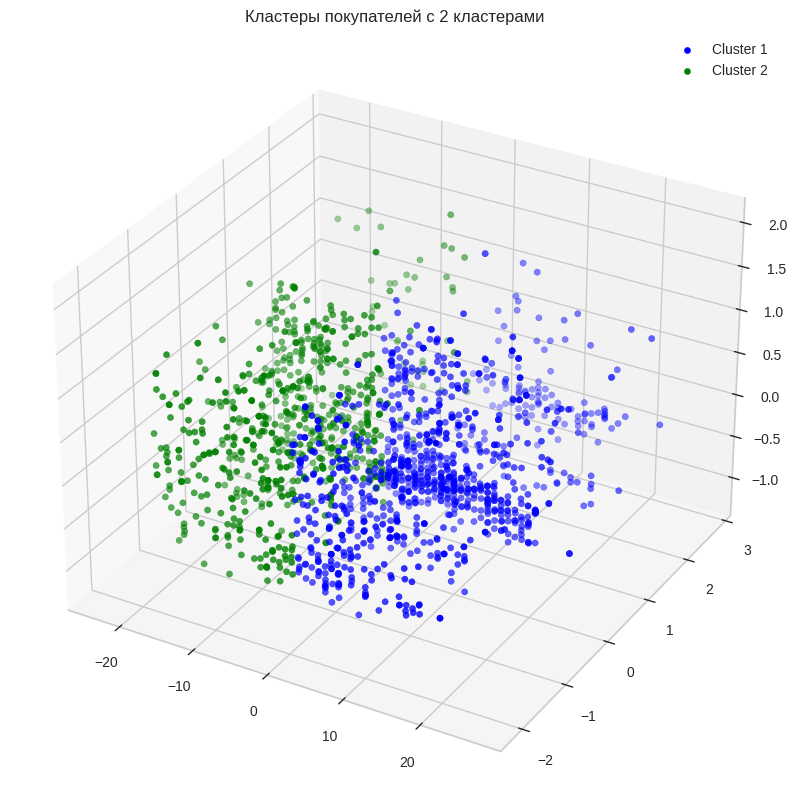

                               Score
silhouette_score            0.582537
davies_bouldin_score        0.559693
calinski_harabasz_score  3855.744640
Aglomerative


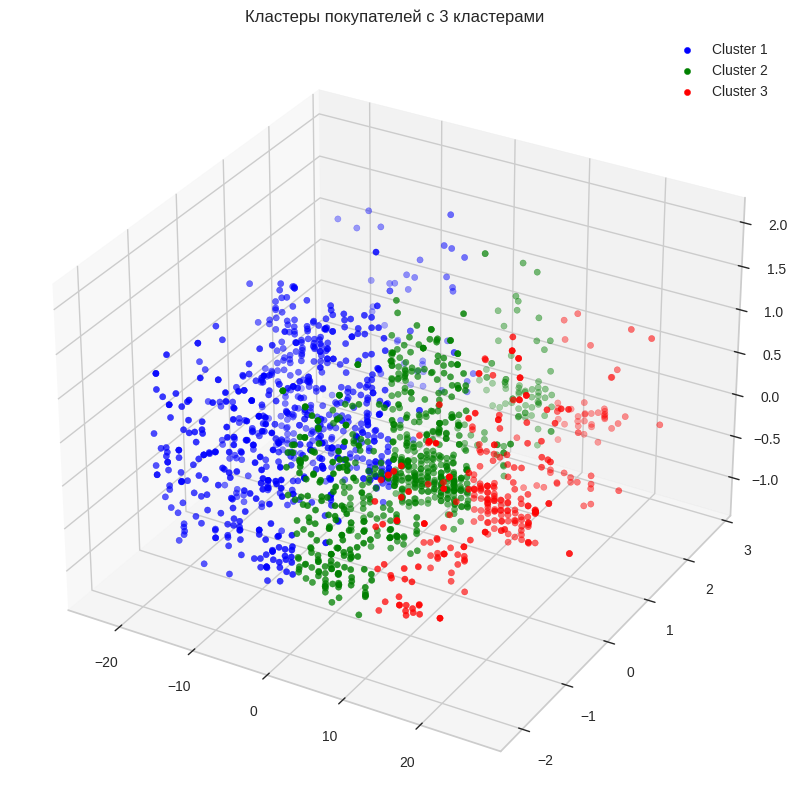

                               Score
silhouette_score            0.526379
davies_bouldin_score        0.547412
calinski_harabasz_score  3986.178437
Kmean


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


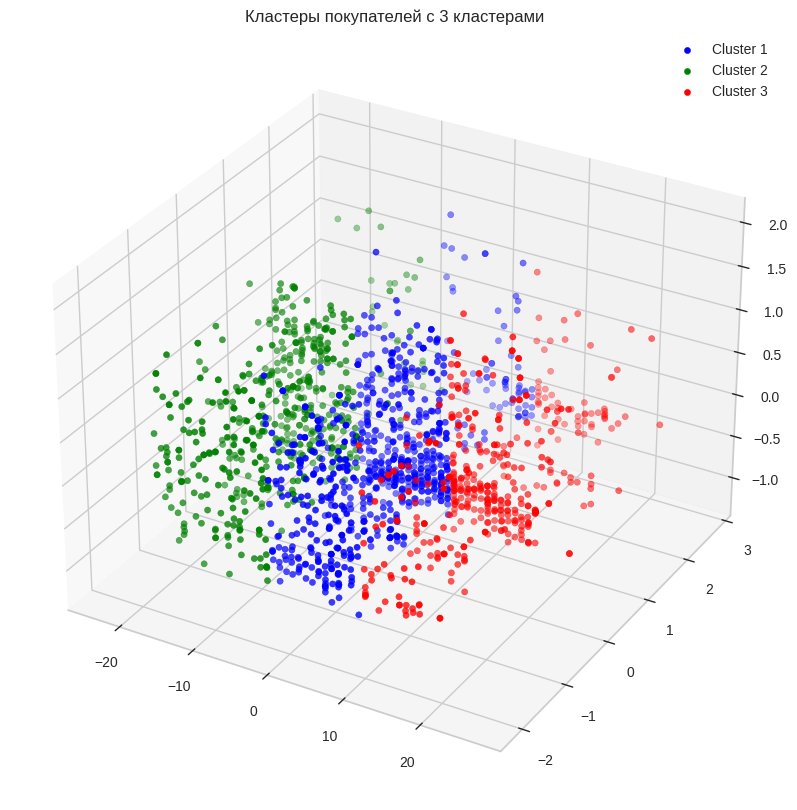

                               Score
silhouette_score            0.546972
davies_bouldin_score        0.565922
calinski_harabasz_score  4946.308993
Aglomerative


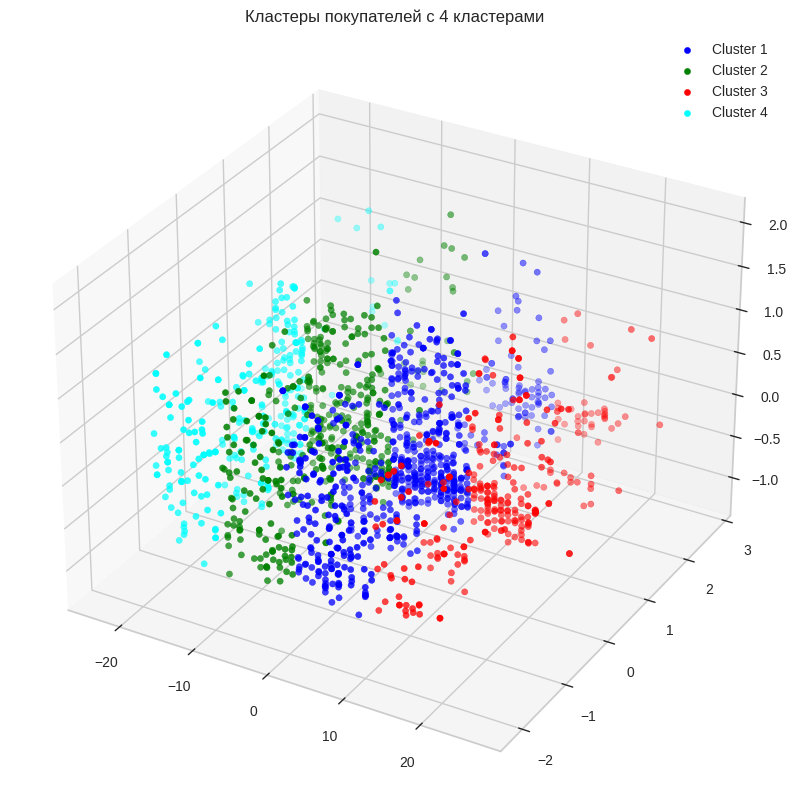

                               Score
silhouette_score            0.510060
davies_bouldin_score        0.567180
calinski_harabasz_score  5238.096284
Kmean


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


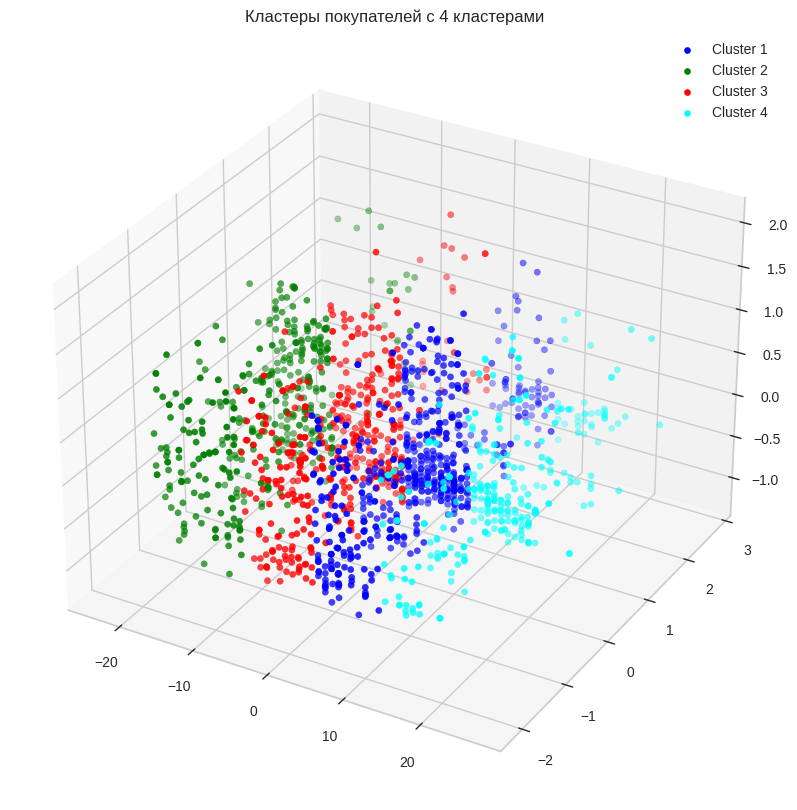

                               Score
silhouette_score            0.534111
davies_bouldin_score        0.567531
calinski_harabasz_score  5823.030335
Aglomerative


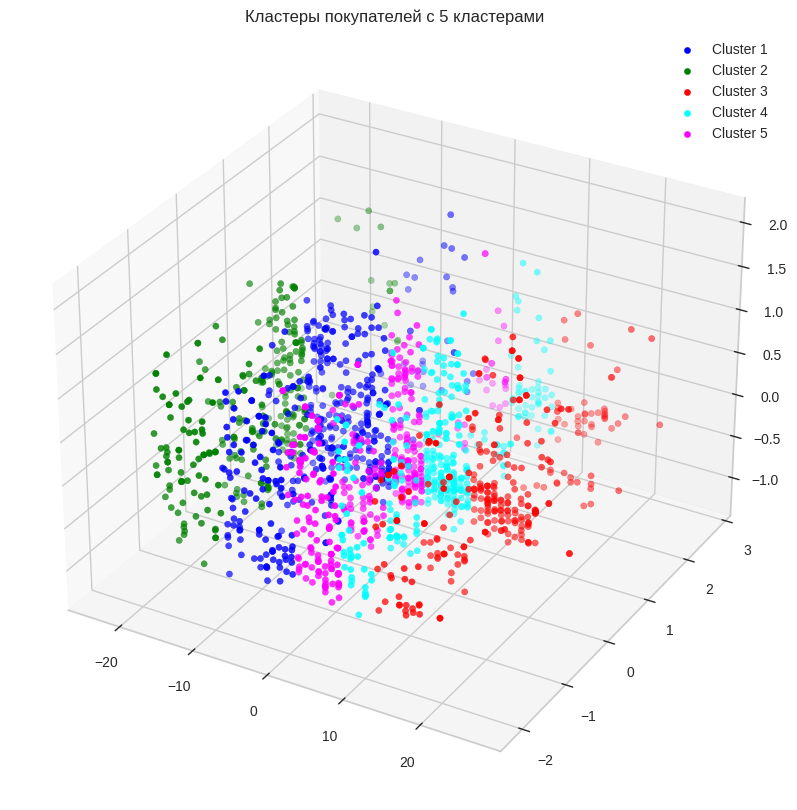

                               Score
silhouette_score            0.479123
davies_bouldin_score        0.617667
calinski_harabasz_score  5688.422231
Kmean


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


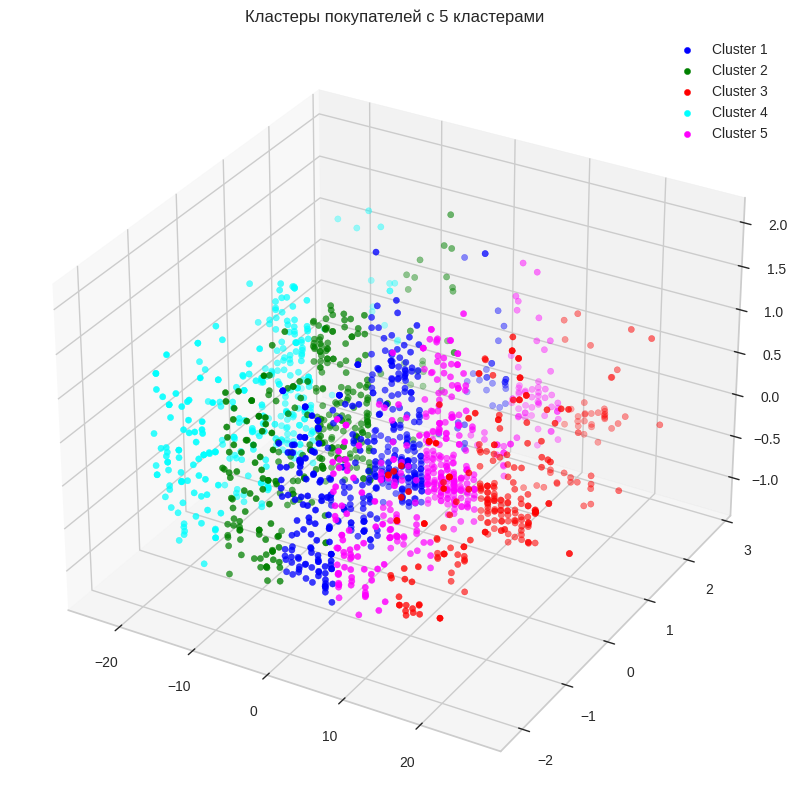

                               Score
silhouette_score            0.532476
davies_bouldin_score        0.574347
calinski_harabasz_score  6532.195737


In [26]:
for i in range(2,6):
  print('Aglomerative')
  data=claster(df)
  aglo=data.preprocesing(OrdinalEncoder(),MinMaxScaler())
  data.work(AgglomerativeClustering( linkage='ward',compute_full_tree=True,n_clusters=i),aglo,i,[silhouette_score,davies_bouldin_score,calinski_harabasz_score])
  print('Kmean')
  data=claster(df)
  kmeans=data.preprocesing(OrdinalEncoder(),MinMaxScaler())
  data.work(KMeans(n_clusters=i),kmeans,i,[silhouette_score,davies_bouldin_score,calinski_harabasz_score])

### Conclusion:

> The best average of the three metrics was shown by the K means algorithm for 4 clusters in the future we will use it.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


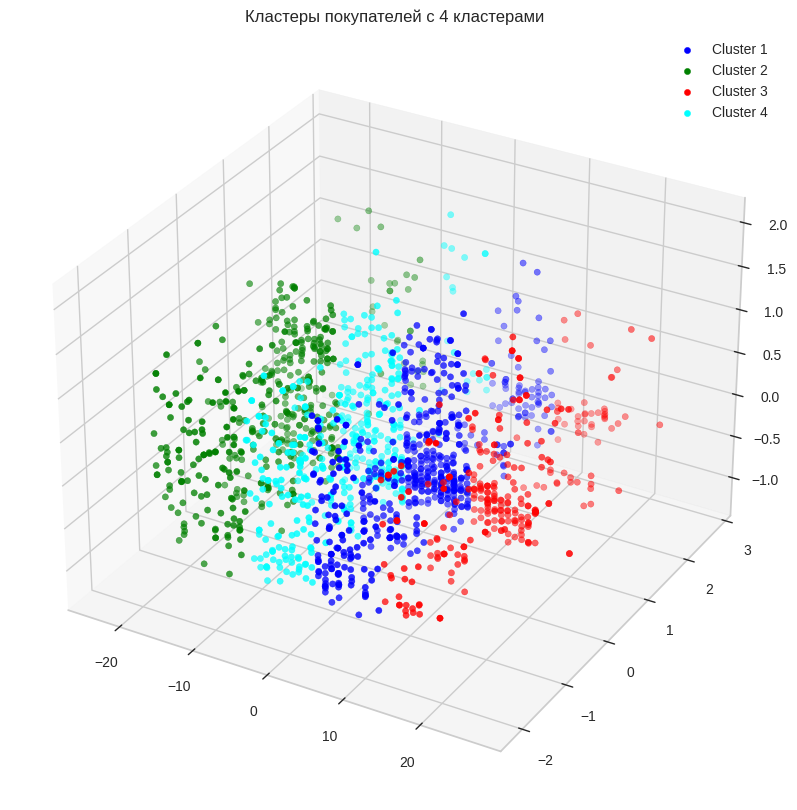

                               Score
silhouette_score            0.542631
davies_bouldin_score        0.560050
calinski_harabasz_score  5825.922023


In [27]:
data=claster(df)
kmeans=data.preprocesing(OrdinalEncoder(),MinMaxScaler())
df['clusters']=data.work(KMeans(n_clusters=4),kmeans,4,[silhouette_score,davies_bouldin_score,calinski_harabasz_score])


In [28]:
print(df['clusters'].value_counts())
new_df=df

0    575
1    438
3    412
2    291
Name: clusters, dtype: int64


In [29]:
new_df['clusters']=new_df['clusters'].astype('category')

In [30]:
def rename(data):
  if data['clusters'] == 0:
    return 'Group_1'
  elif data['clusters']==1:
    return 'Group_2'
  elif data['clusters'] ==3:
    return 'Group_3'
  else:
    return 'Group_4'

In [31]:
df['clusters']=df.apply(rename,axis=1)

In [32]:
new_df.info()
bar_columns=['Education','Marital_Status','Year_Birth']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1716 non-null   object 
 1   Education            1716 non-null   object 
 2   Marital_Status       1716 non-null   object 
 3   Income               1716 non-null   float64
 4   MntWines             1716 non-null   float64
 5   MntFruits            1716 non-null   float64
 6   MntMeatProducts      1716 non-null   float64
 7   MntFishProducts      1716 non-null   float64
 8   MntSweetProducts     1716 non-null   float64
 9   MntGoldProds         1716 non-null   float64
 10  NumWebPurchases      1716 non-null   float64
 11  NumCatalogPurchases  1716 non-null   float64
 12  NumStorePurchases    1716 non-null   float64
 13  NumWebVisitsMonth    1716 non-null   float64
 14  Childs               1716 non-null   float64
 15  count_of_purchases   1716 non-null   f

## Task 3: To analyze the resulting groups.






### Let's divide our columns into several groups for analysis :

1.   A group of nominative features that can provide general information about customers
2.   A group of attributes that display purchases of groups of certain products
3.   A group that will display the number of purchases where they are perfect and activity



In [33]:
first_category=['Year_Birth', 'Education', 'Marital_Status','Childs', 'Income','Basket']
second_category=['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts',
                 'MntSweetProducts','MntGoldProds']
third_category=['NumWebVisitsMonth','NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases',
                'procent_offline','count_of_purchases']


## First category


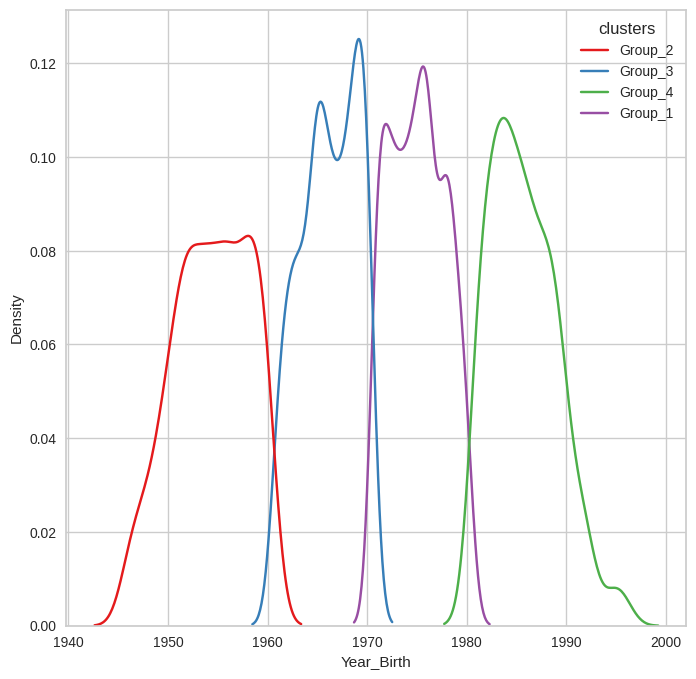

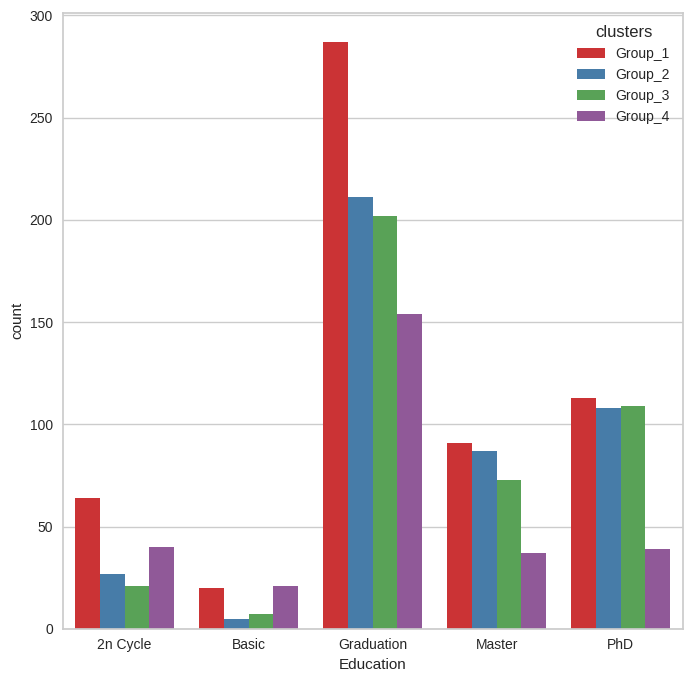

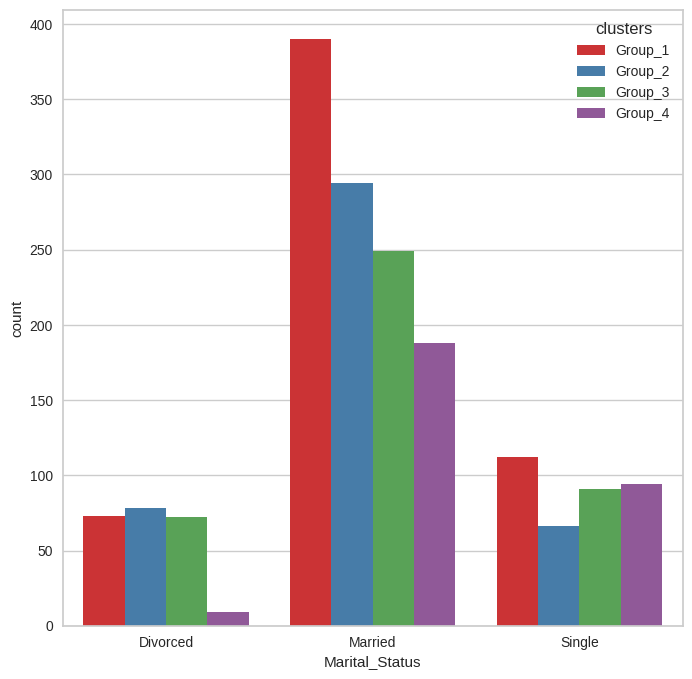

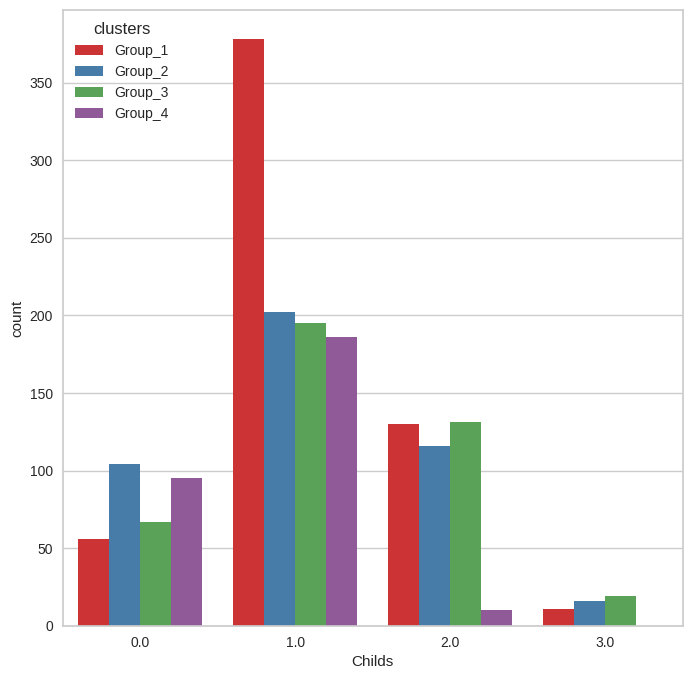

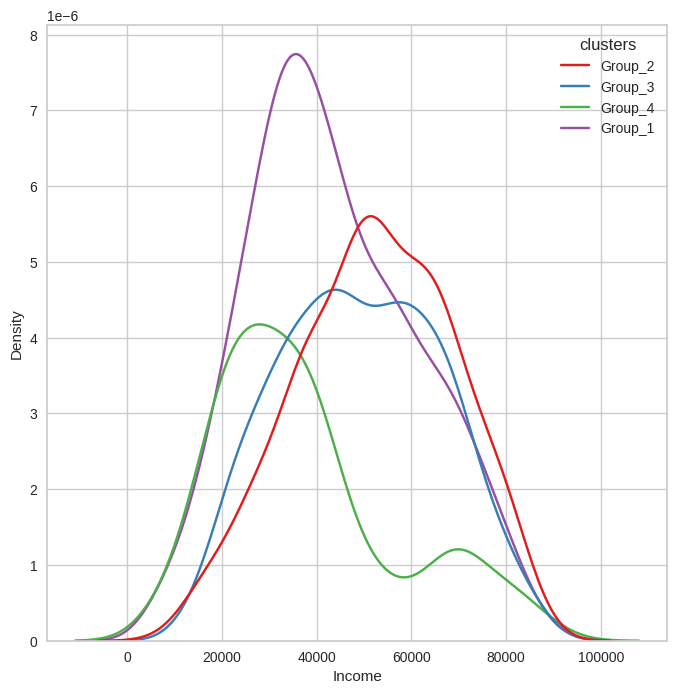

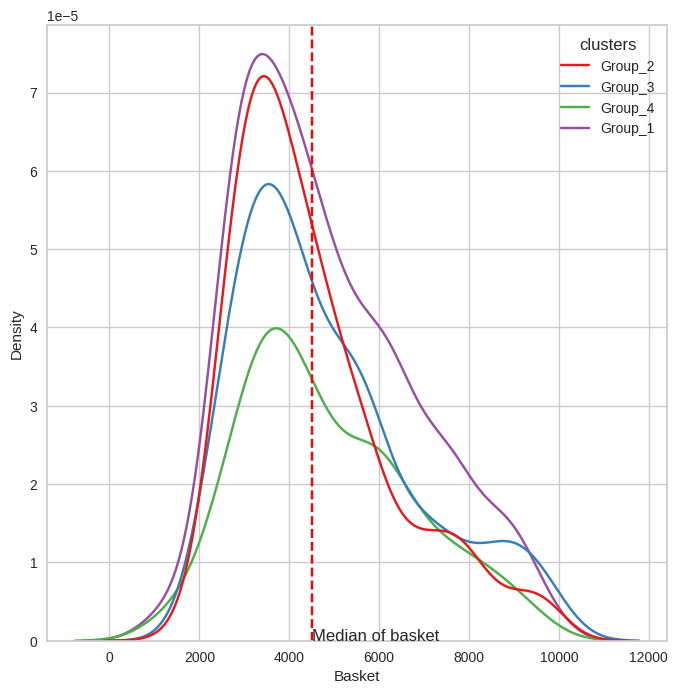

<Figure size 800x800 with 0 Axes>

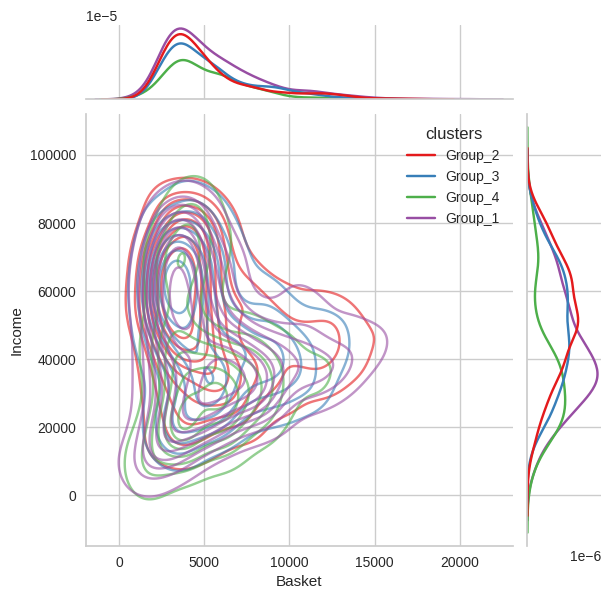

In [34]:
for i in first_category:
  if i not in ['Income','Basket','Year_Birth']:
    plt.figure(figsize=(8,8))
    data=new_df.pivot_table(index=i,columns='clusters',values='MntSweetProducts',aggfunc='count')
    pivot_df = data.reset_index()
    melted_df = pivot_df.melt(id_vars=i, value_name='count', var_name='clusters')
    sns.barplot(x=i, y='count', hue='clusters', data=melted_df, palette='Set1')
    plt.show()
  elif i=='Basket':
    plt.figure(figsize=(8,8))
    sns.kdeplot(data=new_df,x=new_df.loc[new_df[i]<10000][i],palette='Set1',hue='clusters')
    plt.axvline(new_df['Basket'].median(), linestyle='--', color='red')
    plt.text(new_df['Basket'].median(),0,'Median of basket')
    plt.show()
    plt.figure(figsize=(8,8))
    sns.jointplot(x=new_df[i],y=new_df['Income'],hue=new_df['clusters'],kind='kde',palette='Set1',alpha=0.6)
    plt.show()
  elif i=='Year_Birth':
    plt.figure(figsize=(8,8))
    sns.kdeplot(data=new_df,x=new_df[i],palette='Set1',hue='clusters',common_norm=False)
  else:
    plt.figure(figsize=(8,8))
    sns.kdeplot(data=new_df,x=new_df[i],palette='Set1',hue='clusters')
    plt.show()

### Conclusion about first part


> We see a clear division between groups by :
* Age:Group 1 is the oldest of their age before 1961, Group 2 comes after from 1958 to 1972, Group 3 goes from 1978 to 1982 and the last 4 group from 1988 to 2000.
* Education:The most educated is group 2, followed by group 3. The less educated group is the 4th group. 
* Marital status:Most of all married in the first group and in 3. The least divorced in the 4th group may well be related to age. 
* The profit that the groups bring:We clearly see that Group 1 brings the least about 39 thousand, Group 2 on average brings from 45 thousand to 75 thousand, Group 3 on average brings 60 thousand and this is the best result since most of the people are focused here, as for group 4, there is a clear division by part of this group on average bring about 30 thousand, and the other from 75 thousand to 80 thousand, this is considered the highest indicator, but the number of people here is not as large as the third group. 
* The average basket: the first one, we see that a large accumulation of about 3000 thousand and interestingly, with a small average basket, they generally bring about 70 thousand, Group 2 we see two points of accumulation, the first average basket is slightly above 6000 thousand, but they bring about 30 thousand total income, but at the same time the second point which has an average basket of 4500, but they bring much more from 55 to 75 thousand. As with the incomes of group 3 , the average basket is focused on 3 thousand. with a total income of about 60 thousand, and the last 4 group has as many as three points of accumulation, 1 point and 2 point is the average basket of 3 thousand and 6 thousand with an average income of no more than 30 thousand and 3 point is also 3 thousand of the average basket, but at the same time they bring about 70 thousand.
* Children:We see that the 4 groups most often do not have children, and they have no more than 2 as much as possible, People from the second group have one child more often than others, people from groups 1 and 3 are the most large




## Second category


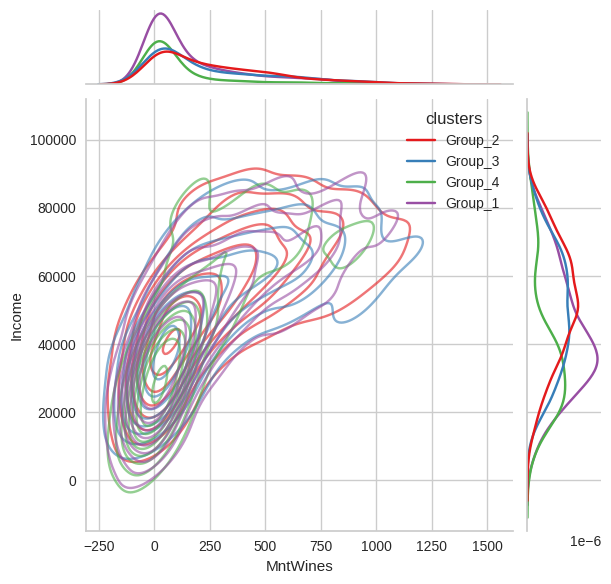

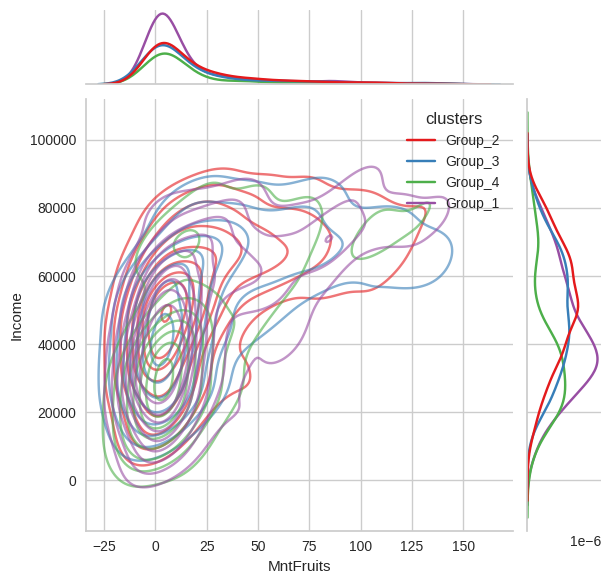

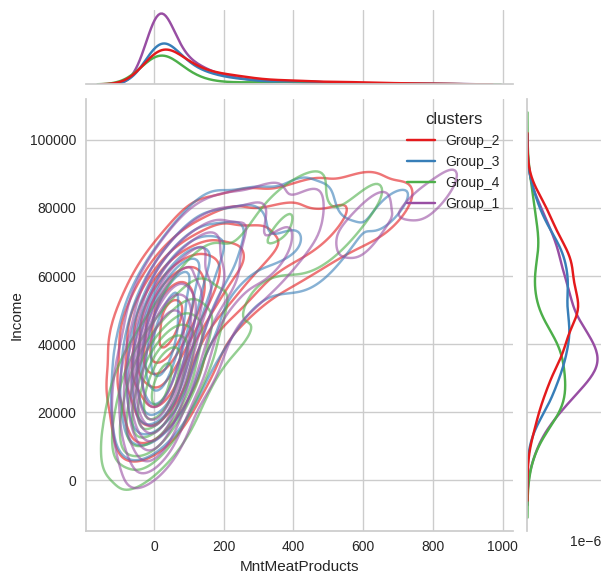

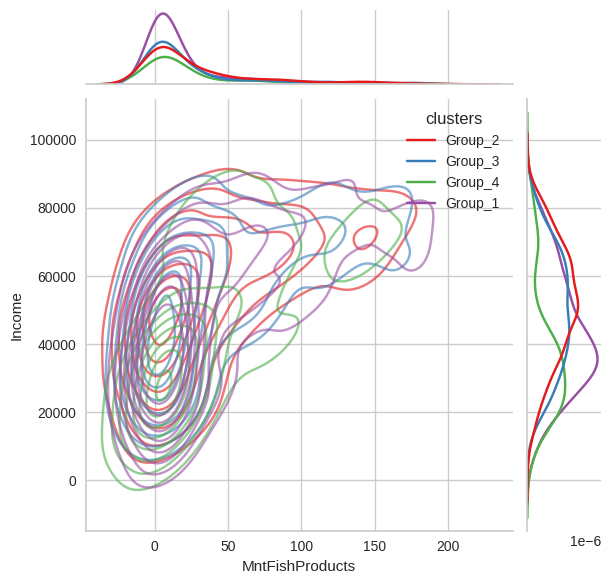

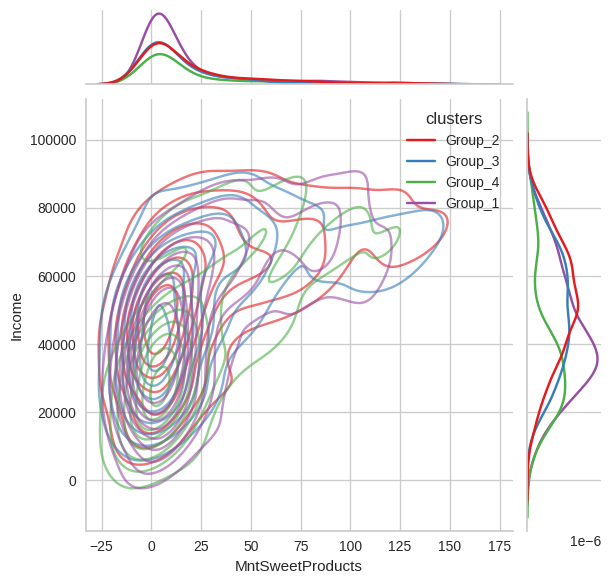

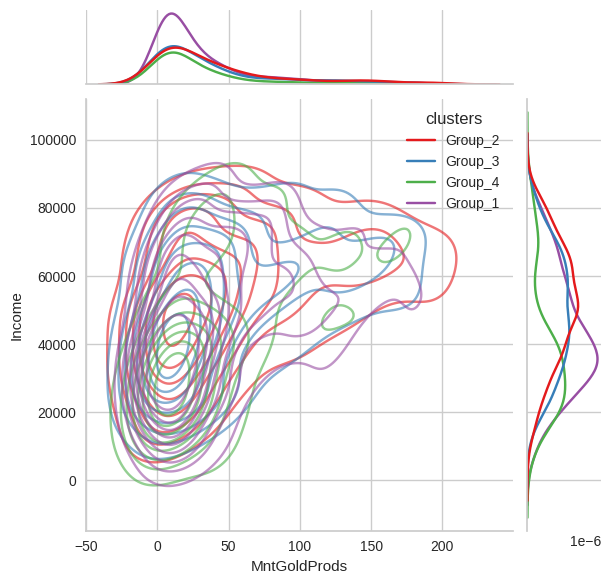

In [35]:
for i in second_category:
  
  sns.jointplot(x=new_df[i],y=new_df['Income'],hue=new_df['clusters'],kind='kde',palette='Set1',alpha=0.6)
  plt.show()

### Conclusion second part

> Product Report:
* Alcohol we see that 1 group is ready to spend more than all other groups 2 group goes after it, the least buys alcohol 4 group ,then comes the third group, we also see that, in general, we see a trend that the more alcohol is bought, the more profit is made, but the main group of people is from 0 to 250 units.
* Fruit sales here we can observe a trend that people from the 4th group buy fruit the most and at the same time bring the most profit.
* Meat sales here we see that the main sales for all classes are approximately in the same range from 0 to 250 units and that it is quite logical that this brings the company to 60 thousand.We see that the first group is actively allocated here, which has purchases in large quantities, there are purchases of 600 and 800 units.But as for the first group, these are more abnormal values, but rarely the 2nd group buys meat more than normal.
* Fish sales : here we can see that, as with meat, the trend keeps from 0 to 50 units in almost all groups, but there are interesting things such as 4 groups have people who buy more than 100 units of fish.
* Sweet goods, everyone buys in about the same range, it can be seen that 2 and 1 groups buy in larger quantities than the rest
*  Promotional products are more popular with the 2nd group with a profit of up to 60 thousand, and the first group of people, it is also interesting to observe that the 4 groups that buy up to 50 units bring the company the most money.



## Third category


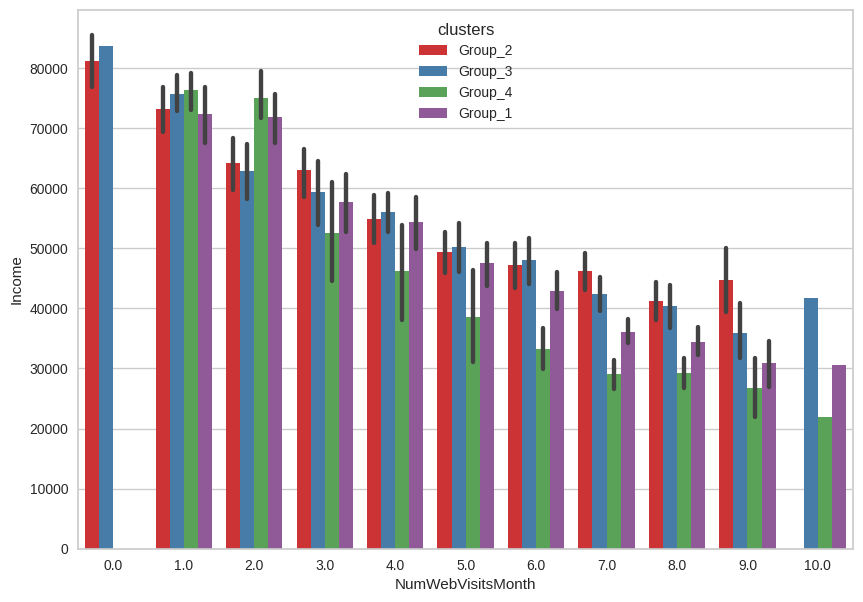

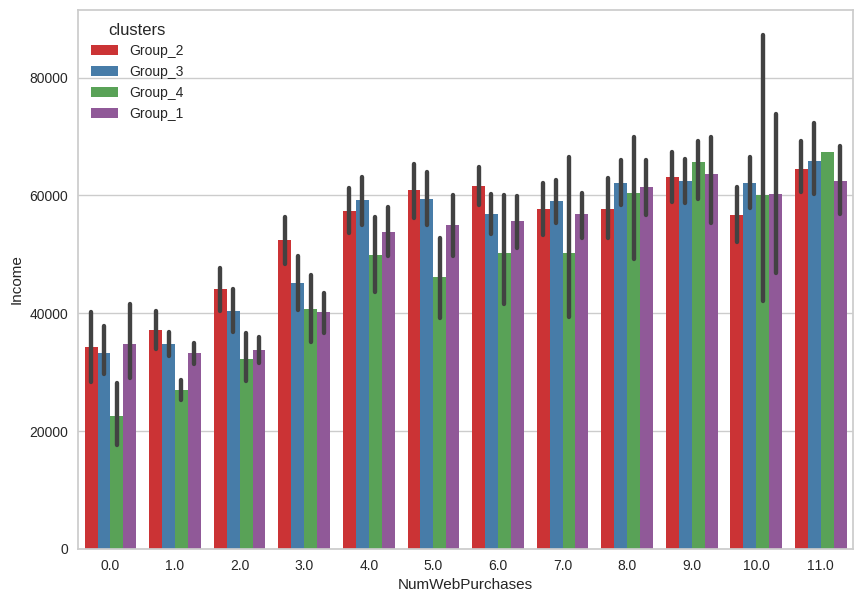

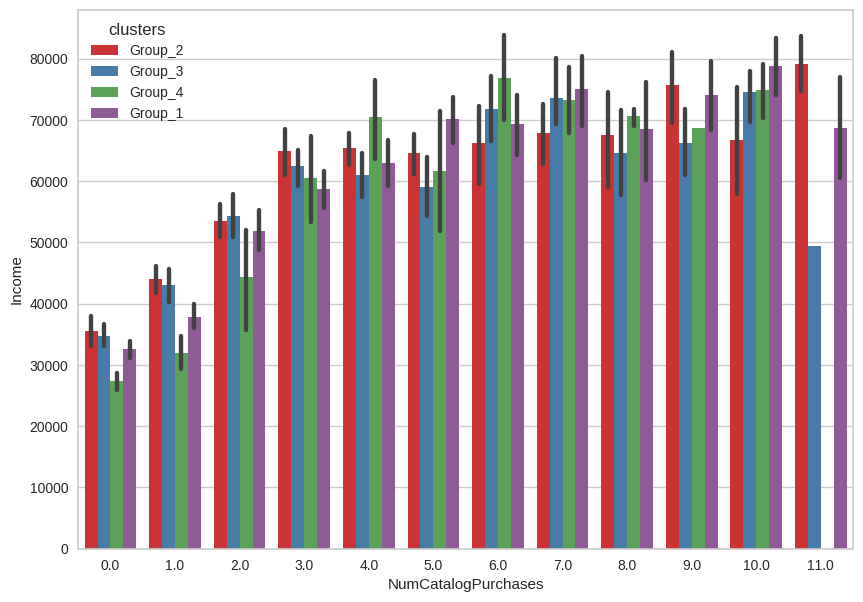

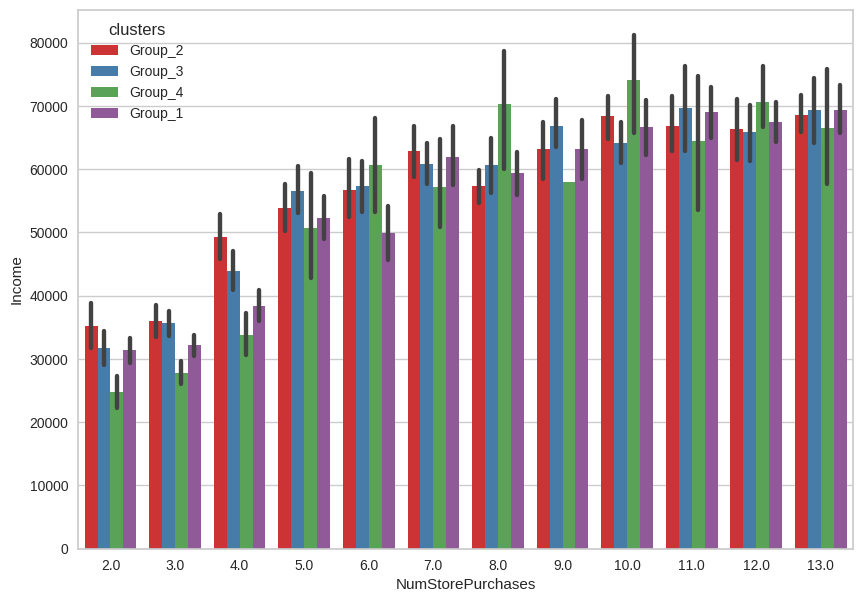

<Figure size 1000x700 with 0 Axes>

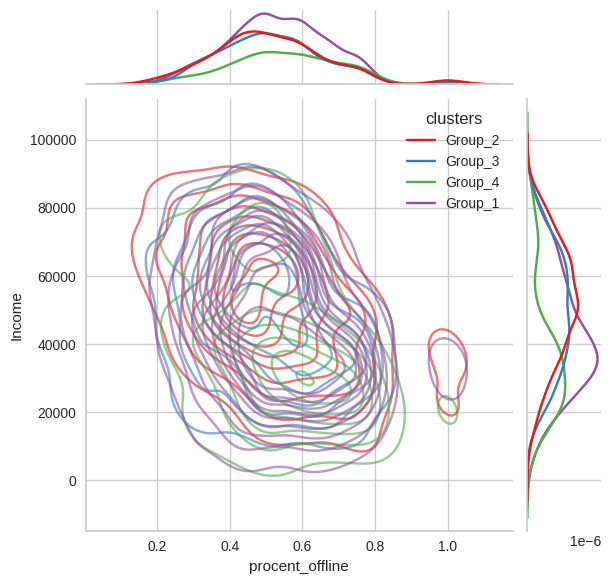

<Figure size 1000x700 with 0 Axes>

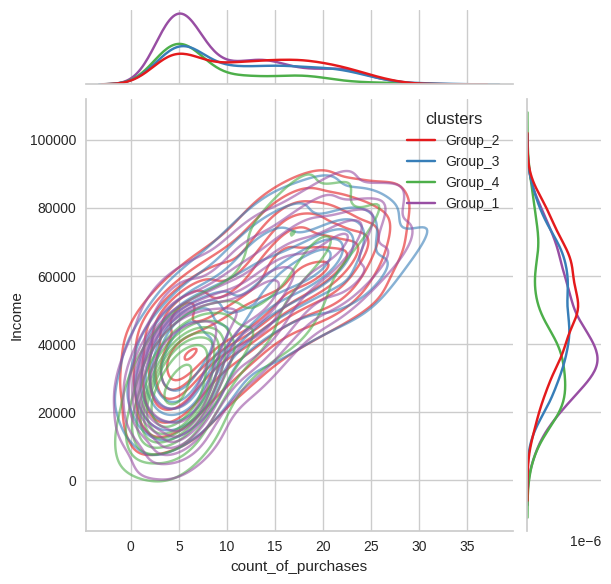

In [36]:

for i in third_category:
  if i not in ['procent_offline','count_of_purchases']:
    plt.figure(figsize=(10,7))
    sns.barplot(x=new_df[i],y=new_df['Income'],hue=new_df['clusters'], palette='Set1')
    plt.show()
  else:
    plt.figure(figsize=(10,7))
    sns.jointplot(x=new_df[i],y=new_df['Income'],hue=new_df['clusters'],kind='kde',palette='Set1',alpha=0.6)
    plt.show()

### Conclusion third part

> 
* Site visit: We see that the 1st and 4th group visited the site at least once,people of the 2nd and 3rd groups can do without visiting the site, along with this, the 3rd group most often visits the site 10 times
* Group 4 makes the most purchases on the site, otherwise we can observe that people who make purchases on the site bring the company no more than 65 thousand
* We can see that the catalog is more popular with the first group, which is interesting, people from the 4th group did not make more than 10 purchases on the catlog,as well as more affluent people use the catlog, as from 3 to 10 purchases, the profit grows from 50 thousand to 80
*  Purchases in a physical store we can see that a small part of the people from group 2 did not make purchases in a physical store, and in general we can observe a trend that group 4 makes purchases more often, but at the same time they do not bring atk a lot of money.
* Offline buyers We can see that some people from the 2nd and 1rd groups have never used online platforms when shopping, but at the same time these categories do not bring much money,in the 1st group we see that they make purchases less often in a physical store, but at the same time the profit they make is about 60 thousand,4 the group can also be divided into two groups, those who use online more often and they spend more money, and those who are less likely to bring about 30 thousand on average.


## Task 4: Draw conclusions and make suggestions.

### Summary information for each group

Group 1 (Born before 1961):

- Older demographic
- Mostly married
- Low profit generation
- High average basket value
- Prefers purchasing alcohol
- Less likely to use online platforms
- Descriptive Information: This group consists of older, predominantly married individuals who contribute the least to overall profit. They have a high average basket value, with a preference for purchasing alcohol. They are less inclined to use online platforms for shopping and may prefer the in-store experience.

Group 2 (Born between 1958 and 1972):

- Middle-aged demographic
- Highly educated
- Moderate profit generation
- Varying average basket value
- Prefers purchasing alcohol and promotional products
- More likely to use online platforms
- Descriptive Information: Group 2 represents a middle-aged, highly educated audience. They generate moderate profits with varying average basket values. Their purchasing preferences include alcohol and promotional products. This group is more likely to use online platforms for shopping.

Group 3 (Born between 1978 and 1982):

- Middle-aged demographic
- Married
- High profit generation
- Low average basket value
- Similar preferences to Group 1
- Descriptive Information: This group comprises middle-aged, married individuals who contribute significantly to overall profit, despite having a low average basket value. Their purchasing preferences are similar to Group 1, and they may be more inclined to shop in physical stores.

Group 4 (Born between 1988 and 2000):

- Younger demographic
- Less educated
- High profit generation with potential
- Prefers purchasing fruits
- Highly engaged with online store and catalog
- Descriptive Information: Group 4 is characterized by a younger, less educated demographic that generates high profits with potential for growth. They prefer purchasing fruits and are the most engaged with online shopping platforms, including the use of catalogs.


### Recomended

> Group-specific marketing campaigns:

- Group 1:

 - Implement targeted promotions for alcohol, such as discounts, combo offers, or loyalty programs.
 - Provide in-store events or experiences that appeal to their age group and preferences.
 - Use traditional marketing channels like print ads, radio, or direct mail to reach them.
- Improve customer retention:
  - Offer a senior discount program or age-specific loyalty program that rewards them for repeat purchases.
  - Keep them informed of new alcohol products or limited-time offers through direct mail or print newsletters.
  - Provide exceptional in-store customer service and assistance, catering to their preferences and needs.

- Group 2 :

 - Offer special deals on alcohol and promotional products, targeting their preferences.
 - Leverage their education by sharing informative content about products and their benefits.
 - Use a mix of traditional and digital marketing channels to reach this audience.
- Improve customer retention:
  - Share informative content related to their product preferences (e.g., the benefits of certain promotional products, insights about alcohol types).
  - Use a mix of traditional and digital communication channels to maintain engagement, such as email newsletters and print magazines.
  - Offer exclusive deals and promotions tailored to their preferences and education level, positioning your brand as a knowledgeable resource.

- Group 3 :

 - Implement family-oriented promotions, considering their marital status and higher spending power.
 - Offer bundle deals or discounts to encourage increased spending per transaction.
 - Use both digital and traditional marketing channels to engage with them effectively.
- Improve customer retention:
  - Send personalized offers and promotions based on their purchase history and preferences, targeting their interests and family needs.
  - Use family-oriented events or in-store experiences to keep them engaged and interested in your brand.
  - Leverage both digital and traditional marketing channels, such as email and direct mail, to maintain contact and encourage repeat purchases.

- Group 4 :

 - Encourage fruit purchases by offering discounts, bundles, or seasonal promotions.
 - Invest in improving the online shopping experience and promote exclusive online deals.
 - Utilize digital marketing channels, such as social media, email marketing, and influencer partnerships.
- Improve customer retention:
    - Implement a digital loyalty program that rewards them for repeat online purchases and catalog usage.
    - Use email marketing and social media to share exclusive online deals, seasonal fruit promotions, and relevant content that resonates with their preferences.
    - Offer personalized product recommendations and a seamless online shopping experience to keep them engaged and loyal to your brand.


## Streamlit

In [41]:
%%writefile app.py

import pandas as pd
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D #3d оси
from yellowbrick.cluster import KElbowVisualizer#выбор кролчества кластеров
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,RobustScaler,MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
import numpy as np
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
import streamlit as st

st.set_option('deprecation.showPyplotGlobalUse', False)
st.title("Project: Clustering of store customers to identify the best offers within the store chain.")
st.write('We have customer data of the grocery store chain.We will divide the project into several tasks:')


st.text('Task 1: It is necessary to identify the model that will best be able to divide buyers.')
st.text('Task 2: To analyze the resulting groups.')
st.text('Task 3: Draw conclusions and make suggestions.')

df=pd.read_csv('/content/drive/MyDrive/учеба/marketing_campaign.csv',sep='\t')
my_colors=['#730080','#00ab66','#636363','#779f73']



st.title("DataFrame of this company")
st.table(df.head())

st.write("Let's create a correlation matrix between the features to determine which features are important")


matrix_corr=df.corr()
fig, ax = plt.subplots(figsize=(20, 10))
go.Figure(data=go.Heatmap(z=matrix_corr))
sns.heatmap(matrix_corr, annot=True, ax=ax)
st.pyplot(fig)
plt.close()  # Close the first graph

st.write("Let's check the numerical signs for outliers and we use Z-score to determine outliers")

for i in [i for i in df.columns if df[i].dtype=='int']:
  data=df[i]
  z_scores = stats.zscore(data)
  threshold = 3
  outliers = df[np.abs(z_scores) > threshold]
  df.loc[outliers.index, i] = None
df.isna().sum().plot(kind='barh')
st.pyplot()

st.text('As we can see from the heat map and graph, we have columns that do not carry significance and abnormal data that we will delete')

for i in ['NumWebPurchases', 'NumCatalogPurchases','NumWebVisitsMonth']:
  df=df.loc[df[i]<15]
df=df.drop(['Complain','AcceptedCmp2','Z_CostContact','Z_Revenue','AcceptedCmp3','NumDealsPurchases','Recency','ID','Dt_Customer','Response'],axis=1)
df=df.loc[df['Income']<100000]#We also see values that are knocked out of the total mass in the amount of profit
df=df.loc[df['Year_Birth']>1945]#We can see anomalies in the column with the date of birth, and therefore we will remove everyone older than 1945
df=df.loc[df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']!=0]#Removed those customers who did not make purchases in stores
df['Year_Birth']=df['Year_Birth'].astype('object')#Change of types 
columns_object=[i for i in  df.columns if df[i].dtypes!='int' and i!='Income' ]
df=df.dropna()

st.write('Creating new features')
st.text("Let's combine the family statuses.")
st.text("Let's combine the signs of children and adolescents in the family.")
st.text("Let's identify the percentage of purchases made directly in the store.")
st.text("We will add new signs in the form of an average basket and customer activity.")

import numpy as np
bad=['Absurd','Alone','YOLO']
df=df.query('Marital_Status not in @bad')

def maried_status(data):
  
  if data['Marital_Status']in ['Married','Together']:
    return 'Married'
  elif data['Marital_Status'] in ['Divorced','Widow']:
    return 'Divorced'
  else:
    return data['Marital_Status']

def offline(data):
  online=data['NumWebPurchases']+data['NumCatalogPurchases']
  offline=data['NumStorePurchases']
  if online==0:
    return 1
  elif offline==0:
    return 0
  else:
    return np.round(offline/(online+offline),2)

df['Marital_Status']=df.apply(maried_status,axis=1)

df['Childs']=df['Kidhome']+df['Teenhome']

df['count_of_purchases']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

df['Basket']=np.round(df['Income']/(df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']),2)

df['procent_offline']=df.apply(offline,axis=1)

df['is_active']=((df['AcceptedCmp4']+df['AcceptedCmp5']+df['AcceptedCmp1'])>=2).map(int)

df=df.drop(['Kidhome','Teenhome','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1'],axis=1)

st.write('Our datframe with new columns')
st.table(df.head())

st.write('')
columns_num=[i for i in  df.columns if df[i].dtypes!='object' and i not in ['is_active','Response']]

preprocesing=make_column_transformer((OrdinalEncoder(),['Education','Marital_Status']),
                                     (StandardScaler(),columns_num),remainder='passthrough')
important=df[[i for i in df.columns][:4]]


df_encoder=pd.DataFrame(preprocesing.fit_transform(df),columns=df.columns)
df_encoder.dropna(inplace=True)

st.write('Due to the fact that we have quite a lot of features and there is also a correlation between them, we will use the PCA algorithm in order to reduce the dimension')

pca=PCA(n_components=3)
df_pca=pd.DataFrame(pca.fit_transform(df_encoder),columns=['list_c1','list_c2','list_c3'])

st.write('Transformed data in space')

x =df_pca["list_c1"]
y =df_pca["list_c2"]
z =df_pca["list_c3"]
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="cyan", marker="o" )
st.pyplot(fig)


st.title('Task 1: It is necessary to identify the model that will best be able to divide buyers.')


class claster:
  def __init__(self,data):
    self.data=data

  def preprocesing(self,metod_of_object,metod_of_num):
    columns_num=[i for i in  self.data.columns if self.data[i].dtypes!='object' and i not in ['is_active','Response']]

    preprocesing=make_column_transformer((metod_of_object,['Education','Marital_Status']),
                                     (metod_of_num,columns_num),remainder='passthrough')
    
    self.df_encoder=pd.DataFrame(preprocesing.fit_transform(self.data),columns=self.data.columns)
    print('+')
    pca=PCA(n_components=3)
    self.df_pca=pd.DataFrame(pca.fit_transform(self.df_encoder),columns=['list_c1','list_c2','list_c3'])
    return self.df_pca

  def detected(self,algoritm,data):
    self.algoritm=algoritm
    Elbow_M = KElbowVisualizer(self.algoritm, k=10)
    Elbow_M.fit(data)
    Elbow_M.show()

  def work(self,model,data,num,score):
    models=model.fit(data)
    data['labels']=models.labels_
    silhouette_score=score[0](self.df_pca, models.labels_)
    davies_bouldin_score=score[1](self.df_pca, models.labels_)
    calinski_harabasz_score=score[2](self.df_pca, models.labels_)
    
    figer= go.Figure(data=[go.Scatter3d(x=data['list_c1'],y=data['list_c2'],
    z=data['list_c3'],mode='markers',marker=dict(
            size=4,
            color=data['labels'], 
            opacity=0.8))])
          
    st.plotly_chart(figer)
    plt.show()
    st.write(pd.DataFrame({'Score':[silhouette_score,davies_bouldin_score,calinski_harabasz_score]},index=['silhouette_score','davies_bouldin_score','calinski_harabasz_score']))
    return model.labels_
    

st.write('I decided to use two algorithms these are K means and Agglomerative (since these are algorithms of different principles, it will be interesting to see which of them will show the best indicator)')
st.text('We use three metrics :')
st.text('1) Silhouette score: The silhouette score measures how well each data point is separated from its own cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better cluster separation.')
st.text('2) Calinski-Harabasz index: The Calinski-Harabasz index measures the ratio of the between-cluster variance to the within-cluster variance. Higher values indicate better cluster separation.')
st.text('3) Davies-Bouldin index: The Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster, and the average distance between each cluster and its least similar cluster. Lower values indicate better cluster separation.')

st.write('The Best model')
st.write('The best average of the three metrics was shown by the K means algorithm for 4 clusters in the future we will use it.')
data=claster(df)
kmeans=data.preprocesing(OrdinalEncoder(),MinMaxScaler())
df['clusters']=data.work(KMeans(n_clusters=4),kmeans,4,[silhouette_score,davies_bouldin_score,calinski_harabasz_score])

st.title('If you want , you can experiment yourself')
st.write("Let's choose different clustering models")
models = ['KMeans', 'Aglomeriv']
selected_models = st.multiselect('Choose a model for clustering', models)

if 'KMeans' in selected_models:
  pre=['StandardScaler','RobustScaler','MinMaxScaler']
  preproces=st.multiselect('Select a model for preprocessing features', pre)

  if 'StandardScaler' in preproces:
    data=claster(df)
    kmeans=data.preprocesing(OrdinalEncoder(),StandardScaler())
    num_of_clusters=st.number_input('select the number of clusters', min_value=2, max_value=12)
    data.work(KMeans(n_clusters=num_of_clusters),kmeans,num_of_clusters,[silhouette_score,davies_bouldin_score,calinski_harabasz_score])  
    if st.button('Use it ?'): 
      df['clusters']=data.work(KMeans(n_clusters=num_of_clusters),kmeans,num_of_clusters,[silhouette_score,davies_bouldin_score,calinski_harabasz_score])

  if 'RobustScaler' in preproces:
    data=claster(df)
    kmeans=data.preprocesing(OrdinalEncoder(),RobustScaler())
    num_of_clusters=st.number_input('select the number of clusters', min_value=2, max_value=12)
    data.work(KMeans(n_clusters=num_of_clusters),kmeans,num_of_clusters,[silhouette_score,davies_bouldin_score,calinski_harabasz_score]) 
    if st.button('Use it ?'): 
      df['clusters']=data.work(KMeans(n_clusters=num_of_clusters),kmeans,num_of_clusters,[silhouette_score,davies_bouldin_score,calinski_harabasz_score])

  if 'MinMaxScaler' in preproces:
    data=claster(df)
    kmeans=data.preprocesing(OrdinalEncoder(),MinMaxScaler())
    num_of_clusters=st.number_input('select the number of clusters', min_value=2, max_value=12)
    data.work(KMeans(n_clusters=num_of_clusters),kmeans,num_of_clusters,[silhouette_score,davies_bouldin_score,calinski_harabasz_score])
    if st.button('Use it ?'): 
      df['clusters']=data.work(KMeans(n_clusters=num_of_clusters),kmeans,num_of_clusters,[silhouette_score,davies_bouldin_score,calinski_harabasz_score])

if 'Aglomeriv' in selected_models:
  pre=['StandardScaler','RobustScaler','MinMaxScaler']
  preproces=st.multiselect('Select a model for preprocessing features', pre)

  if 'StandardScaler' in preproces:
    data=claster(df)
    aglo=data.preprocesing(OrdinalEncoder(),StandardScaler())
    num_of_clusters=st.number_input('select the number of clusters', min_value=2, max_value=12)
    st.text('Выебри метод :"ward","complete","single","average"')
    metod=st.text_input(' Method :')
    data.work(AgglomerativeClustering(n_clusters=num_of_clusters, linkage=metod,compute_full_tree=True),aglo,2,[silhouette_score,davies_bouldin_score,calinski_harabasz_score])
    if st.button('Use it ?'):
      df['clusters']=data.work(AgglomerativeClustering(n_clusters=num_of_clusters, linkage=metod,compute_full_tree=True),aglo,2,[silhouette_score,davies_bouldin_score,calinski_harabasz_score])
      
  if 'RobustScaler' in preproces:
    data=claster(df)
    aglo=data.preprocesing(OrdinalEncoder(),RobustScaler())
    num_of_clusters=st.number_input('select the number of clusters', min_value=2, max_value=12)
    st.text('Выебри метод :"ward","complete","single","average"')
    metod=st.text_input(' Method :')
    data.work(AgglomerativeClustering(n_clusters=num_of_clusters, linkage=metod,compute_full_tree=True),aglo,2,[silhouette_score,davies_bouldin_score,calinski_harabasz_score])
    if st.button('Use it ?'):
      df['clusters']=data.work(AgglomerativeClustering(n_clusters=num_of_clusters, linkage=metod,compute_full_tree=True),aglo,2,[silhouette_score,davies_bouldin_score,calinski_harabasz_score])

  if 'MinMaxScaler' in preproces:
    data=claster(df)
    aglo=data.preprocesing(OrdinalEncoder(),MinMaxScaler())
    num_of_clusters=st.number_input('select the number of clusters', min_value=2, max_value=12)
    st.text('Выебри метод :ward,complete,single,average')
    metod=st.text_input(' Method :')
    data.work(AgglomerativeClustering(n_clusters=num_of_clusters, linkage=metod,compute_full_tree=True),aglo,2,[silhouette_score,davies_bouldin_score,calinski_harabasz_score])
    if st.button('Use it?'):
      df['clusters']=data.work(AgglomerativeClustering(n_clusters=num_of_clusters, linkage=metod,compute_full_tree=True),aglo,2,[silhouette_score,davies_bouldin_score,calinski_harabasz_score])


new_df=df
new_df['clusters']=new_df['clusters'].astype('category')





bar_columns=['Education','Marital_Status','Year_Birth']

st.write('The ratio of the resulting clusters')
st.table(new_df['clusters'].value_counts(normalize=True))

def rename(data):
  if data['clusters'] == 0:
    return 'Group_1'
  elif data['clusters']==1:
    return 'Group_2'
  elif data['clusters'] ==3:
    return 'Group_3'
  else:
    return 'Group_4'

new_df['clusters']=new_df.apply(rename,axis=1)

st.title('Task 2: To analyze the resulting groups.')
st.write("Let's divide our columns into several groups for analysis :")
st.text('A first group of nominative features that can provide general information about customers')
st.text('A second group of attributes that display purchases of groups of certain products')
st.text('A third group that will display the number of purchases where they are perfect and activity')

first_category=['Year_Birth', 'Education', 'Marital_Status', 'Income','Basket','Childs']
second_category=['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts','MntGoldProds']
third_category=['NumWebVisitsMonth','NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases',
                'procent_offline','count_of_purchases']




st.title('First group')

for i in first_category:
  if i not in ['Income','Basket','Year_Birth']:
    plt.figure(figsize=(8,8))
    data=new_df.pivot_table(index=i,columns='clusters',values='MntSweetProducts',aggfunc='count')
    pivot_df = data.reset_index()
    melted_df = pivot_df.melt(id_vars=i, value_name='count', var_name='clusters')
    sns.barplot(x=i, y='count', hue='clusters', data=melted_df, palette=my_colors)
    st.pyplot()
    plt.show()
  elif i=='Basket':
    plt.figure(figsize=(8,8))
    sns.kdeplot(data=new_df,x=new_df.loc[new_df[i]<10000][i],palette=my_colors,hue='clusters')
    plt.axvline(new_df['Basket'].median(), linestyle='--', color='red')
    plt.text(new_df['Basket'].median(),0,'Медиана корзины')
    plt.show()
    plt.figure(figsize=(8,8))
    sns.jointplot(x=new_df[i],y=new_df['Income'],hue=new_df['clusters'],kind='kde',palette=my_colors,alpha=0.6)
    st.pyplot()
    plt.show()
  elif i=='Year_Birth':
    plt.figure(figsize=(8,8))
    sns.kdeplot(data=new_df,x=new_df[i],palette=my_colors,hue='clusters',common_norm=False)
    st.pyplot()
  else:
    plt.figure(figsize=(8,8))
    sns.kdeplot(data=new_df,x=new_df[i],palette=my_colors,hue='clusters')
    st.pyplot()
    plt.show()

st.write("""Conclusion about first part""")
st.subheader("Age:")
st.write("- Group 1 is the oldest of their age before 1961")
st.write("- Group 2 comes after from 1958 to 1972")
st.write("- Group 3 goes from 1978 to 1982")
st.write("- The last 4 groups are from 1988 to 2000")
st.write("")
  # Education
st.subheader("Education:")
st.write("- The most educated is Group 2, followed by Group 3")
st.write("- The less educated group is the 4th group")
st.write("")

# Marital status
st.subheader("Marital status:")
st.write("- Most of all married in the first group and in 3")
st.write("- The least divorced in the 4th group may well be related to age")
st.write("")

# Profit
st.subheader("The profit that the groups bring:")
st.write("- Group 1 brings the least about 39 thousand")
st.write("- Group 2 on average brings from 45 thousand to 75 thousand")
st.write("- Group 3 on average brings 60 thousand and this is the best result since most of the people are focused here")
st.write("- As for Group 4, there is a clear division by part of this group on average bring about 30 thousand, and the other from 75 thousand to 80 thousand. This is considered the highest indicator, but the number of people here is not as large as the third group.")
st.write("")

# Average basket
st.subheader("The average basket:")
st.write("- The first group, we see that a large accumulation of about 3000 thousand and interestingly, with a small average basket, they generally bring about 70 thousand")
st.write("- Group 2 we see two points of accumulation, the first average basket is slightly above 6000 thousand, but they bring about 30 thousand total income, but at the same time the second point which has an average basket of 4500, but they bring much more from 55 to 75 thousand")
st.write("- As with the incomes of Group 3, the average basket is focused on 3 thousand with a total income of about 60 thousand")
st.write("- The last 4 group has as many as three points of accumulation, 1 point and 2 point is the average basket of 3 thousand and 6 thousand with an average income of no more than 30 thousand and 3 point is also 3 thousand of the average basket, but at the same time they bring about 70 thousand.")
st.write("")

# Children
st.subheader("Children:")
st.write("- We see that the 4 groups most often do not have children, and they have no more than 2 as much as possible")
st.write("- People from the second group have one child more often than others")
st.write("- People from groups 1 and 3 are the most large")

st.title('Second group')
for i in second_category:
  
  sns.jointplot(x=new_df[i],y=new_df['Income'],hue=new_df['clusters'],kind='kde',palette=my_colors,alpha=0.6)
  st.pyplot()

st.write('')
# Alcohol sales
st.subheader("Alcohol sales:")
st.write("- Group 1 is ready to spend more than all other groups")
st.write("- Group 2 goes after it")
st.write("- The least buys alcohol 4 group")
st.write("- Then comes the third group")
st.write("")
st.write("We also see that, in general, the trend is that the more alcohol is bought, the more profit is made, but the main group of people is from 0 to 250 units.")
st.write("")

# Fruit sales
st.subheader("Fruit sales:")
st.write("- People from the 4th group buy fruit the most and at the same time bring the most profit")
st.write("")

# Meat sales
st.subheader("Meat sales:")
st.write("- The main sales for all groups are approximately in the same range from 0 to 250 units")
st.write("- The first group is actively allocated here, which has purchases in large quantities, there are purchases of 600 and 800 units")
st.write("- Rarely the 2nd group buys meat more than normal")
st.write("")

# Fish sales
st.subheader("Fish sales:")
st.write("- The trend keeps from 0 to 50 units in almost all groups")
st.write("- 4 groups have people who buy more than 100 units of fish")
st.write("")

# Sweet goods sales
st.subheader("Sweet goods sales:")
st.write("- Everyone buys in about the same range")
st.write("- 2 and 1 groups buy in larger quantities than the rest")
st.write("")

# Promotional products sales
st.subheader("Promotional products sales:")
st.write("- Promotional products are more popular with the 2nd group with a profit of up to 60 thousand, and the first group of people")
st.write("- The 4 groups that buy up to 50 units bring the company the most money")

st.title('Third group')
for i in third_category:
  if i not in ['procent_offline','count_of_purchases']:
    plt.figure(figsize=(10,7))
    sns.barplot(x=new_df[i],y=new_df['Income'],hue=new_df['clusters'], palette=my_colors)
    st.pyplot()
  else:
    plt.figure(figsize=(10,7))
    sns.jointplot(x=new_df[i],y=new_df['Income'],hue=new_df['clusters'],kind='kde',palette=my_colors,alpha=0.6)
    st.pyplot()

st.subheader("Site visit:")
st.write("- We see that the 1st and 4th group visited the site at least once")
st.write("- People of the 2nd and 3rd groups can do without visiting the site")
st.write("- The 3rd group most often visits the site 10 times")
st.write("- Group 4 makes the most purchases on the site")
st.write("- People who make purchases on the site bring the company no more than 65 thousand")
st.write("")

# Catalog usage
st.subheader("Catalog usage:")
st.write("- The catalog is more popular with the first group")
st.write("- People from the 4th group did not make more than 10 purchases on the catalog")
st.write("- More affluent people use the catalog")
st.write("- As from 3 to 10 purchases, the profit grows from 50 thousand to 80")
st.write("")

# Purchases in a physical store
st.subheader("Purchases in a physical store:")
st.write("- Group 4 makes purchases more often")
st.write("- But at the same time, they do not bring a lot of money")
st.write("- A small part of people from Group 2 did not make purchases in a physical store")
st.write("")

# Offline buyers
st.subheader("Offline buyers:")
st.write("- Some people from the 2nd and 3rd groups have never used online platforms when shopping")
st.write("- But at the same time, these categories do not bring much money")
st.write("- In the 1st group, we see that they make purchases less often in a physical store, but at the same time the profit they make is about 60 thousand")
st.write("- Group 4 can also be divided into two groups, those who use online more often and they spend more money, and those who are less likely to bring about 30 thousand on average")


color_map={'Group_1': 'red', 'Group_2': 'blue', 'Group_3': 'green','Group_4':'yellow'}

st.title('Conduct your own research')

if st.checkbox('scatter'):
      columns_1=new_df.columns
      selected_column_1 = st.selectbox('Select a column for the axis X ', columns_1)
      columns_2=new_df.columns
      selected_column_2 = st.selectbox('Select a column for the axis Y', columns_2)
      fig=px.scatter(new_df, y=selected_column_2,x=selected_column_1, marginal_x='histogram', marginal_y='histogram',color='clusters',color_discrete_map=color_map)
      
      st.plotly_chart(fig)

if st.checkbox('histogram'):
      columns_x=new_df.columns
      selected_column_x = st.selectbox('Select a column for the axis X ', columns_x)
      fige = px.histogram(new_df, x=selected_column_x, nbins=100, opacity=0.7,color='clusters',color_discrete_map=color_map)
      fige.update_layout(xaxis_rangeslider_visible=True)
      st.plotly_chart(fige) 

st.title('Task 3: Draw conclusions and make suggestions.') 

st.subheader("Group 1:")
st.write("- Older demographic")
st.write("- Mostly married")
st.write("- Low profit generation")
st.write("- High average basket value")
st.write("- Prefers purchasing alcohol")
st.write("- Less likely to use online platforms")
st.write("")
st.write("Recomended:")
st.write("- Implement targeted promotions for alcohol, such as discounts, combo offers, or loyalty programs.")
st.write("- Provide in-store events or experiences that appeal to their age group and preferences.")
st.write("- Use traditional marketing channels like print ads, radio, or direct mail to reach them.")
st.write("- Offer a senior discount program or age-specific loyalty program that rewards them for repeat purchases.")
st.write("- Keep them informed of new alcohol products or limited-time offers through direct mail or print newsletters.")
st.write("- Provide exceptional in-store customer service and assistance, catering to their preferences and needs.")
st.write("")

# Group 2
st.subheader("Group 2:")
st.write("- Middle-aged demographic")
st.write("- Highly educated")
st.write("- Moderate profit generation")
st.write("- Varying average basket value")
st.write("- Prefers purchasing alcohol and promotional products")
st.write("- More likely to use online platforms")
st.write("")
st.write("Recomended:")
st.write("- Offer special deals on alcohol and promotional products, targeting their preferences.")
st.write("- Leverage their education by sharing informative content about products and their benefits.")
st.write("- Use a mix of traditional and digital marketing channels to reach this audience.")
st.write("- Share informative content related to their product preferences.")
st.write("- Use a mix of traditional and digital communication channels to maintain engagement.")
st.write("- Offer exclusive deals and promotions tailored to their preferences and education level.")
st.write("")

# Group 3
st.subheader("Group 3:")
st.write("- Middle-aged demographic")
st.write("- Married")
st.write("- High profit generation")
st.write("- Low average basket value")
st.write("- Similar preferences to Group 1")
st.write("")
st.write("Recomended:")
st.write("- Implement family-oriented promotions, considering their marital status and higher spending power.")
st.write("- Offer bundle deals or discounts to encourage increased spending per transaction.")
st.write("- Use both digital and traditional marketing channels to engage with them effectively.")
st.write("- Send personalized offers and promotions based on their purchase history and preferences.")
st.write("- Use family-oriented events or in-store experiences to keep them engaged and interested in your brand.")
st.write("- Leverage both digital and traditional marketing channels to maintain contact and encourage repeat purchases.")
st.write("")

# Group 4
st.subheader("Group 4:")
st.write("- Younger demographic")
st.write("- Less educated")
st.write("- High profit generation with potential")
st.write("- Prefers purchasing fruits")
st.write("- Highly engaged with online store and catalog")
st.write("")
st.write("Recomended:")
st.write("- Encourage fruit purchases by offering discounts, bundles, or seasonal promotions.")
st.write("- Invest in improving the online shopping experience and promote exclusive online deals.")
st.write("- Utilize digital marketing channels, such as social media, email marketing, and influencer partnerships.")
st.write("- Implement a digital loyalty program that rewards them for repeat online purchases and catalog usage.")
st.write("- Use email marketing and social media to share exclusive online deals, seasonal fruit promotions, and relevant content.")
st.write("- Offer personalized product recommendations and a seamless online shopping experience to keep them engaged and loyal to your brand.")


Overwriting app.py


In [42]:
from pyngrok import ngrok
import os


port = 8502


ngrok.set_auth_token("2OPd0SjgLnOyuQaMw271tkOgGJX_6NbBsSBfgZRtwsqDpd5Ri")
public_url = ngrok.connect(port, "http", bind_tls=True)
print(f"Your Streamlit app is accessible at {public_url}")


!streamlit run app.py --server.port {port}

Your Streamlit app is accessible at NgrokTunnel: "https://b926-35-231-119-177.ngrok-free.app" -> "http://localhost:8502"



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8502
  External URL: http://35.231.119.177:8502

/content/app.py:39: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr=df.corr()
+
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/content/app.py:430: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the r